In [1]:
import torch
from torch import nn
import matplotlib
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'y')

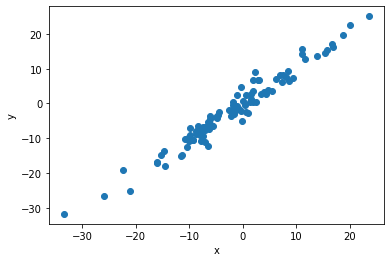

In [2]:
torch.manual_seed(1)
X = torch.randn(100, 1) * 10
y = X + 2 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred



In [4]:
torch.manual_seed(1)
model = LR(1,1)
print(model)


LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
x = torch.tensor([[1.0], [2.0]])
def get_params():
    [w, b] = model.parameters()
    return (w[0][0].item(), b[0].item())
print(get_params())


(0.5152631998062134, -0.44137823581695557)


In [ ]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

In [ ]:
plot_fit('initial_model')

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 100

losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print('epoch:', i, 'loss:', loss.item())
    
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [ ]:
plot_fit('end')